In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column)

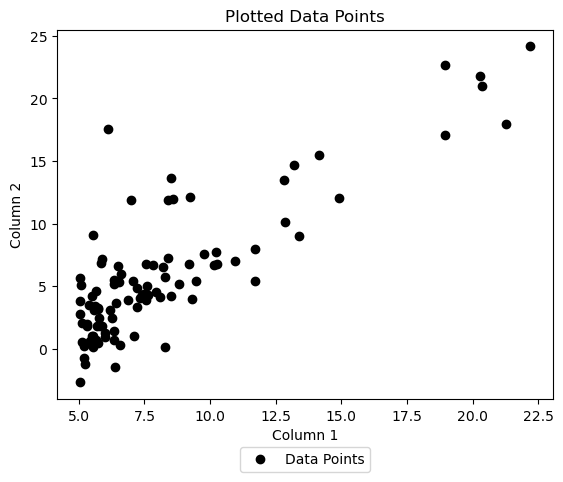

In [16]:
data = np.loadtxt('data2.txt', delimiter=',') # Load data from data2.txt

x = data[:,0].reshape(-1, 1) # Reshape x-values to be a single column
y = data[:,1].reshape(-1, 1) # Reshape y-values to be a single column

plt.plot(x, y, 'o', color = "black", label = "Data Points") #Generates the plot 
plt.title("Plotted Data Points") #Creates a title for the plot
plt.xlabel("Column 1") #Labels the x-axis
plt.ylabel("Column 2") #Labels the y-axis
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.11), ncol=3) #Generates the legend for the plot

plt.show() #Shows the plot

## 2) Finding the Coefficients using Normal Equation

Coefficients determined by the Normal Equation: [[-3.89578088  1.19303364]]
MSE: 8.953942751950358


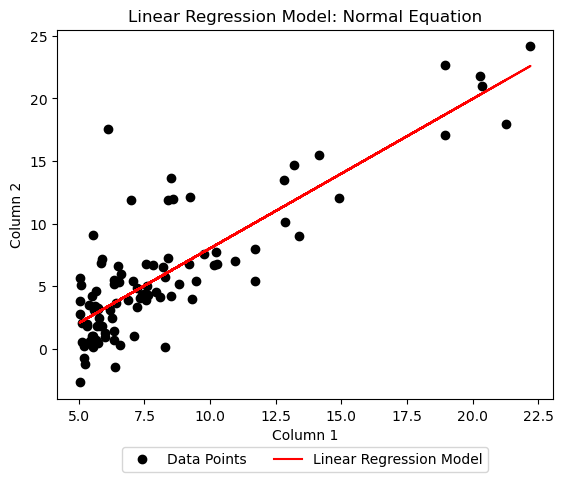

In [25]:
X = np.append(np.ones((x.shape[0], 1)), x, axis=1) # Add a column of ones to X for the intercept term (bias)

theta = np.linalg.inv(X.T @ X) @ X.T @ y # Uses Normal Equation to determine the coefficients
print("Coefficients determined by the Normal Equation:", theta.T)
print('MSE:', np.mean((X @ theta - y) ** 2))

plt.plot(X[:,1], y, 'o', color = "black", label = "Data Points") #
plt.plot(X[:,1], X @ theta, color = "red", label = "Linear Regression Model") #Generates the plot
plt.title("Linear Regression Model: Normal Equation") #Creates a title for the plot
plt.xlabel("Column 1") #Labels the x-axis
plt.ylabel("Column 2") #Labels the y-axis
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.11), ncol=3) #Generates the legend for the plot


## 3) Gradient Descent using Batch and Stochastic modes

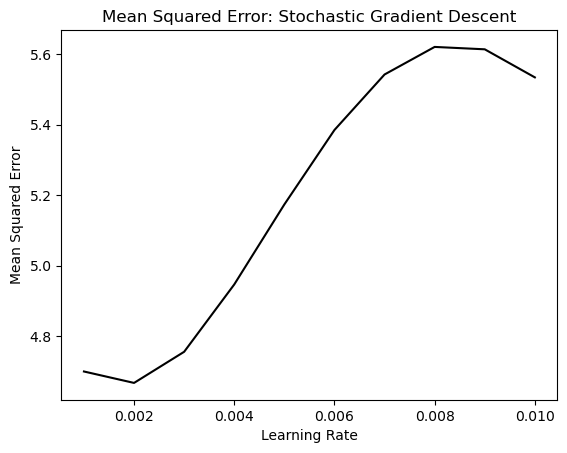

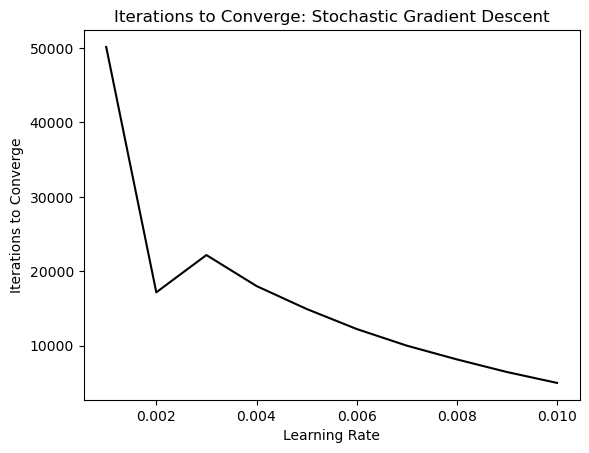

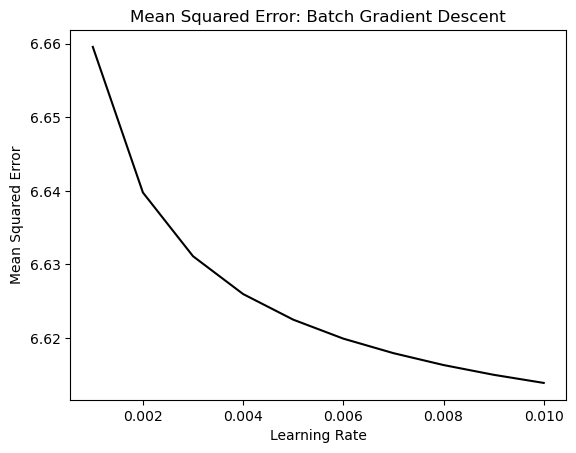

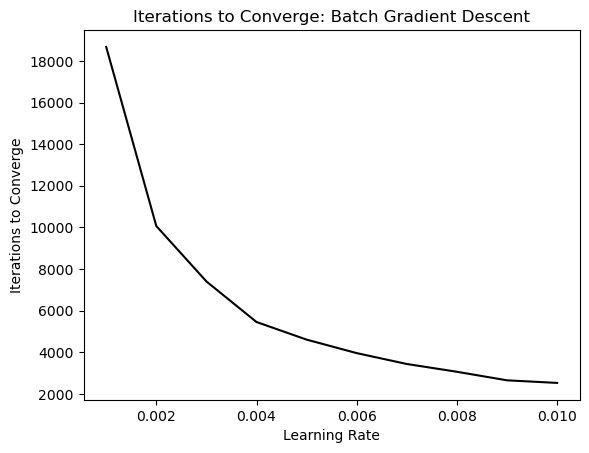

In [24]:
train_size = int(0.8 * X.shape[0])  # Calculate the training set size (80% of the data)
x_train = X[:train_size]  # Select the training data (features)
y_train = y[:train_size]  # Select the training labels
x_test = X[train_size:]  # Select the testing data (features)
y_test = y[train_size:]  # Select the testing labels



def compute_cost(X, Y, weights):  # Define the cost function (MSE)
    return np.sum((X @ weights - Y) ** 2) / X.shape[0]  # Calculate mean squared error

def compute_gradient(X, Y, weights):  # Define the gradient computation function
    grad = np.zeros(weights.shape)  # Initialize gradient vector with zeros
    for idx in range(weights.shape[0]):  # Loop over each weight in the model
        grad[idx] = np.sum((X @ weights - Y) * X[:, idx].reshape(-1, 1)) / X.shape[0]  # Compute gradient for each weight
    return grad  # Return the computed gradient



def perform_gradient_descent(X, Y, weights, learning_rate, tolerance=1e-6, batch_size=1):  # Define gradient descent function
    iteration_count = 0  # Initialize iteration counter
    while True:  # Loop until convergence
        prev_cost = compute_cost(X, Y, weights)  # Compute the previous cost value

        # Update weights using the computed gradient
        for i in range(0, X.shape[0], batch_size):  # Process data in batches
            iteration_count += 1  # Increment iteration counter
            X_subset = X[i:i+batch_size]  # Get a subset of features for the batch
            Y_subset = Y[i:i+batch_size]  # Get the corresponding subset of labels
            weights = weights - learning_rate * compute_gradient(X_subset, Y_subset, weights)  # Update weights using gradient descent
        
        new_cost = compute_cost(X, Y, weights)  # Compute the new cost value

        # Check for convergence
        if abs(prev_cost - new_cost) < tolerance:  # If the cost change is less than tolerance, stop
            break
    
    return weights, iteration_count  # Return the final weights and iteration count


learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]  # List of learning rates to test


MSE_values = []  # Initialize list to store MSE values
iterations_to_converge = []  # Initialize list to store iteration counts

for rate in learning_rates:  # Loop over each learning rate
    weights = np.random.rand(X.shape[1], 1)  # Initialize weights randomly
    weights, iters = perform_gradient_descent(x_train, y_train, weights, rate, batch_size=1)  # Perform gradient descent for the given learning rate
    iterations_to_converge.append(iters)  # Append the number of iterations to the list
    MSE_values.append(np.mean((x_test @ weights - y_test) ** 2))  # Compute MSE for the test set and append


plt.figure()  # Create a new figure for the plot
plt.plot(learning_rates, MSE_values, color = "black")  # Plot learning rates vs. MSE
plt.xlabel('Learning Rate')  # Label the x-axis
plt.ylabel('Mean Squared Error')  # Label the y-axis
plt.title('Mean Squared Error: Stochastic Gradient Descent')  # Set plot title
plt.show()  # Display the plot

\
plt.figure()  # Create a new figure for the plot
plt.plot(learning_rates, iterations_to_converge, color = "black")  # Plot learning rates vs. iterations to converge
plt.xlabel('Learning Rate')  # Label the x-axis
plt.ylabel('Iterations to Converge')  # Label the y-axis
plt.title('Iterations to Converge: Stochastic Gradient Descent')  # Set plot title
plt.show()  # Display the plot



MSE_values = []  # Initialize list to store MSE values
iterations_to_converge = []  # Initialize list to store iteration counts

for rate in learning_rates:  # Loop over each learning rate
    weights = np.random.rand(X.shape[1], 1)  # Initialize weights randomly
    weights, iters = perform_gradient_descent(x_train, y_train, weights, rate, batch_size=x_train.shape[0])  # Perform gradient descent using full batch
    iterations_to_converge.append(iters)  # Append the number of iterations to the list
    MSE_values.append(np.mean((x_test @ weights - y_test) ** 2))  # Compute MSE for the test set and append



plt.figure()  # Create a new figure for the plot
plt.plot(learning_rates, MSE_values, color = "black")  # Plot learning rates vs. MSE
plt.xlabel('Learning Rate')  # Label the x-axis
plt.ylabel('Mean Squared Error')  # Label the y-axis
plt.title('Mean Squared Error: Batch Gradient Descent')  # Set plot title
plt.show()  # Display the plot



plt.figure()  # Create a new figure for the plot
plt.plot(learning_rates, iterations_to_converge, color = "black")  # Plot learning rates vs. iterations to converge
plt.xlabel('Learning Rate')  # Label the x-axis
plt.ylabel('Iterations to Converge')  # Label the y-axis
plt.title('Iterations to Converge: Batch Gradient Descent')  # Set plot title
plt.show()  # Display the plot


### Explanation
A higher learning rate led to faster convergence, as the weights were adjusted more significantly each iteration. However, during stochastic gradient descent, a high learning rate caused the loss to increase, likely due to overcorrection of the weights. In contrast, batch gradient descent converged more quickly with fewer iterations, and although a lower learning rate reduced overfitting, it also resulted in higher losses; the optimal rates were 0.002 for stochastic gradient descent and 0.01 for batch gradient descent, with a potential for even better performance at higher rates